In [30]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('Tampa_mexican_restaurants.csv')
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'categories', 'hours'],
      dtype='object')

In [23]:
df.head(1)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories,hours
0,cCs7yPSyk8NdA-Ufoz_7hw,FodM8aoGMQO2zsQCQxBTYQ,v5ktgWMAARaczTMh2rAJKg,2.0,0,0,0,The service here has gone down. We used to go ...,2017-12-27 02:57:57,San Jose Mexican Restaurant,...,Lutz,FL,33558.0,28.189335,-82.541048,3.0,155,1,"Restaurants, Mexican, Salad","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."


In [24]:
stopwords = nltk.corpus.stopwords.words("english")
wnl = nltk.WordNetLemmatizer()

In [25]:
# vectorize
df['words'] = df['text'].apply(lambda x: nltk.word_tokenize(str(x).lower()))
df['words'].head()

0    [the, service, here, has, gone, down, ., we, u...
1    [what, a, hidden, gem, of, a, restaurant, ., w...
2    [first, visit, tonight, ., nice, ,, clean, pla...
3    [xtreme, tacos, has, become, one, of, my, favo...
4    [visited, last, night, with, a, group, of, six...
Name: words, dtype: object

In [26]:
# remove stopwords/punctuations, lemmatize
df['words'] = df['words'].apply(lambda word_list: [wnl.lemmatize(word) for word in word_list if word.isalpha() and word not in stopwords])
df['words'].head()

0    [service, gone, used, go, lot, go, another, on...
1    [hidden, gem, restaurant, everyone, else, go, ...
2    [first, visit, tonight, nice, clean, place, re...
3    [xtreme, taco, become, one, favorite, place, e...
4    [visited, last, night, group, six, ambiance, s...
Name: words, dtype: object

In [27]:
all_words = [word for sublist in df['words'] for word in sublist]
all_words[:5]

['service', 'gone', 'used', 'go', 'lot']

In [28]:
df_titles = pd.DataFrame(all_words)
df_titles.to_csv('titles.csv',index=False)

      food       taco       good      place      great       time    service    mexican       like        one      order        get       back         go restaurant      would    ordered     really      salsa       chip       also    chicken  delicious        got       love       best      drink          u      fresh        try       come       menu    burrito      table definitely      sauce       even       came    amazing      tampa       nice       well     always      staff     little      could      first   friendly     flavor       make 
     31572      30524      19424      19281      15234      12899      12043      10535      10534      10143       9852       9781       9779       8970       8816       8674       8272       7905       7196       7105       7076       7042       6724       6627       6460       6392       6361       5928       5888       5819       5703       5641       5561       5539       5422       5262       5258       5220       5055       5003       499

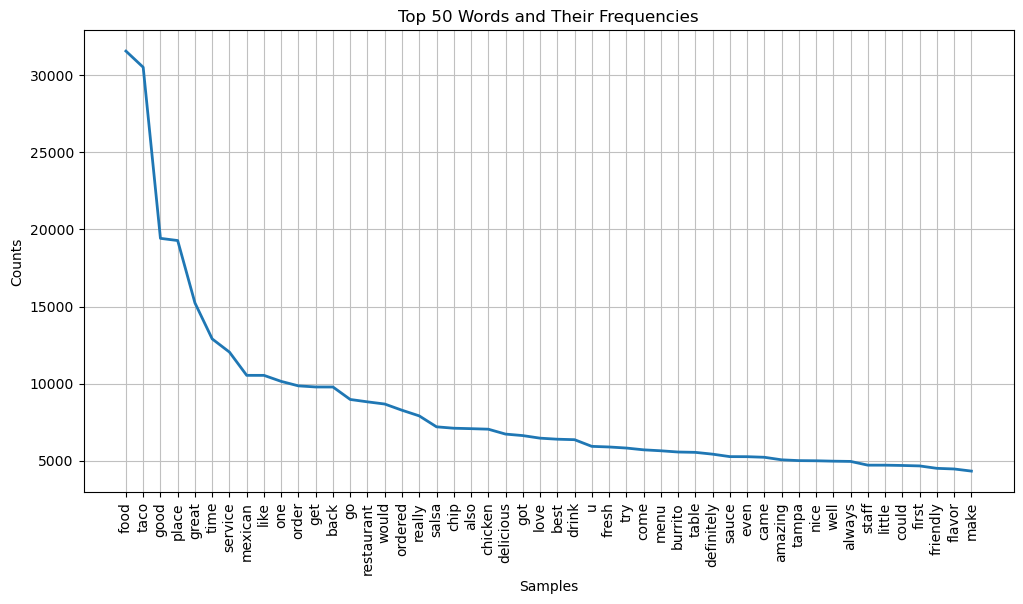

In [37]:
# frequency
fd = nltk.FreqDist(all_words)
fd.tabulate(50)

plt.figure(figsize=(12, 6))
plt.title('Top 50 Words and Their Frequencies')
fd.plot(50, cumulative=False)
plt.show()

      ('mexican', 'food')         ('chip', 'salsa') ('mexican', 'restaurant')         ('first', 'time')           ('taco', 'bus')            ('go', 'back')          ('food', 'good')          ('fish', 'taco')  ('authentic', 'mexican')        ('really', 'good')          ('come', 'back')         ('great', 'food')        ('carne', 'asada')         ('happy', 'hour')         ('food', 'great')          ('good', 'food')   ('customer', 'service')          ('taco', 'bell')   ('highly', 'recommend')        ('pretty', 'good')          ('hot', 'sauce')         ('love', 'place')      ('great', 'service')         ('sour', 'cream')       ('chicken', 'taco')          ('rice', 'bean')          ('next', 'time')      ('service', 'great')       ('taco', 'tuesday')          ('best', 'taco')         ('every', 'time')        ('shrimp', 'taco')        ('great', 'place')        ('coming', 'back')    ('definitely', 'back')         ('food', 'truck')     ('staff', 'friendly')       ('best', 'mexican')      ('corn'

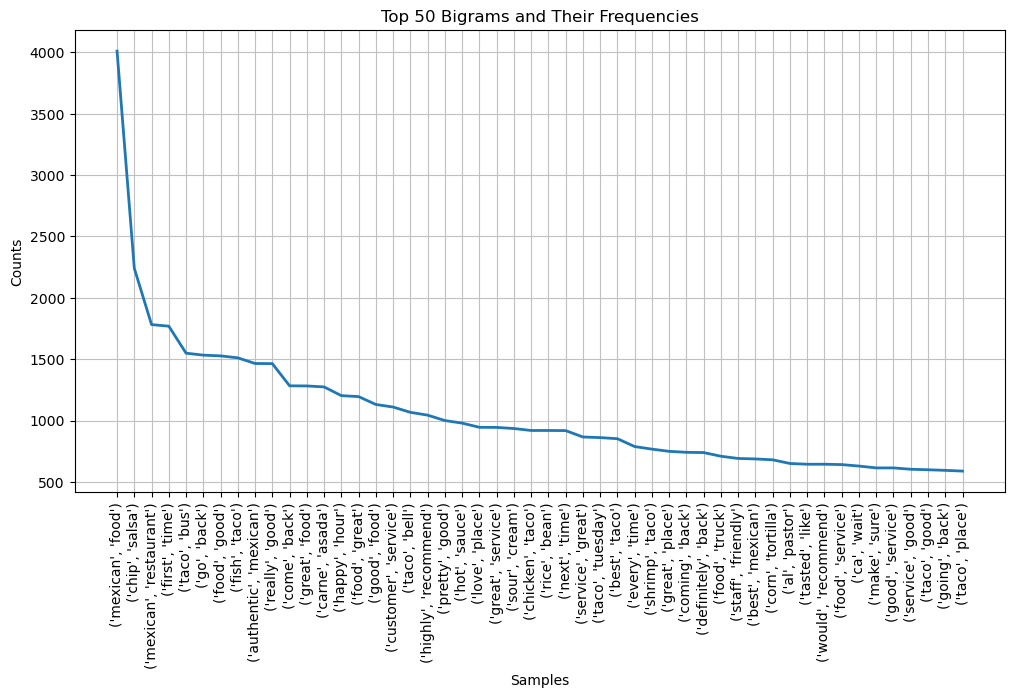

In [38]:
# bigram
finder2 = nltk.collocations.BigramCollocationFinder.from_words(all_words)
finder2.ngram_fd.tabulate(50)

bigram_fd = finder2.ngram_fd
plt.figure(figsize=(12, 6))
plt.title('Top 50 Bigrams and Their Frequencies')
bigram_fd.plot(50, cumulative=False)
plt.show()

     ('authentic', 'mexican', 'food')           ('best', 'mexican', 'food')           ('good', 'mexican', 'food')               ('pico', 'de', 'gallo')                ('wait', 'go', 'back')                  ('ca', 'wait', 'go')            ('carne', 'asada', 'taco')        ('definitely', 'come', 'back')          ('mexican', 'food', 'tampa')          ('food', 'great', 'service')                 ('ca', 'go', 'wrong')      ('definitely', 'coming', 'back')        ('table', 'side', 'guacamole')            ('great', 'food', 'great')             ('best', 'taco', 'tampa')          ('mexican', 'food', 'place')               ('would', 'go', 'back')          ('definitely', 'go', 'back')           ('food', 'good', 'service')            ('food', 'really', 'good')          ('service', 'great', 'food')              ('best', 'taco', 'ever')              ('tampa', 'bay', 'area')              ('taco', 'al', 'pastor')  ('would', 'definitely', 'recommend')      ('would', 'highly', 'recommend')    ('mexican

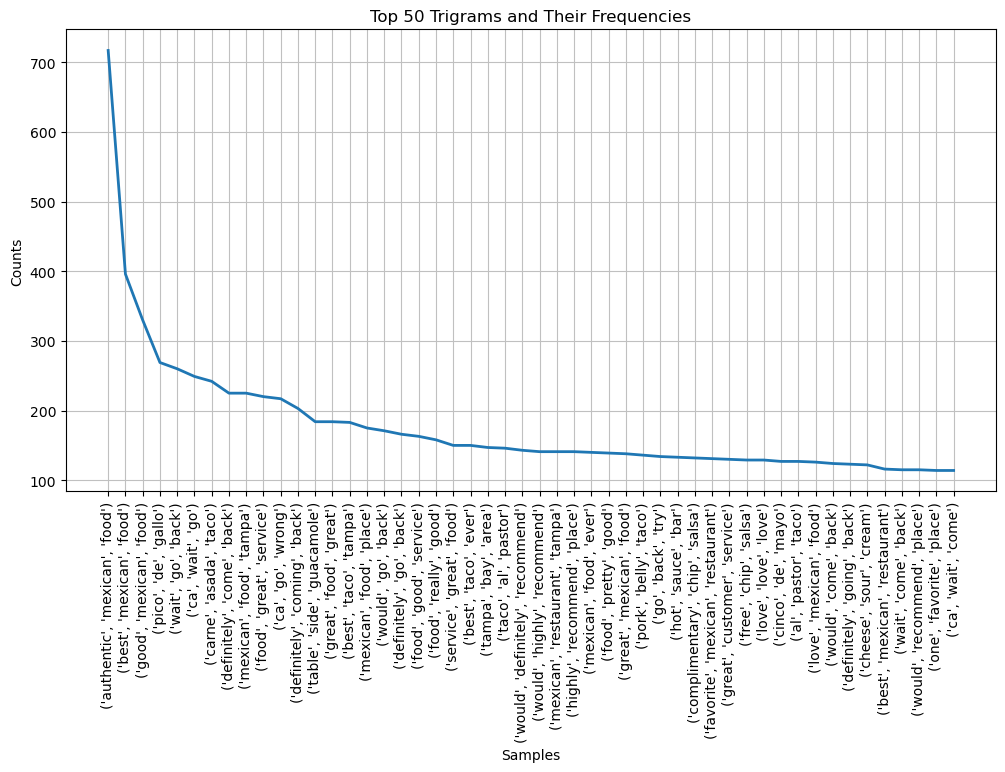

In [39]:
# trigram
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(all_words)
finder3.ngram_fd.tabulate(50)

trigram_fd = finder3.ngram_fd
plt.figure(figsize=(12, 6))
plt.title('Top 50 Trigrams and Their Frequencies')
trigram_fd.plot(50, cumulative=False)
plt.show()

In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [46]:
df['sentiment'] = df['text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [52]:
print(df[['text','sentiment','stars_y']].head())

                                                text  sentiment  stars_y
0  The service here has gone down. We used to go ...    -0.3291      3.0
1  What a hidden gem of a restaurant.  While ever...    -0.1280      4.5
2  First visit tonight. Nice, clean place. Reason...     0.8791      3.0
3  Xtreme Tacos has become one of my favorite pla...     0.9833      4.5
4  Visited last night with a group of six. Ambian...     0.7000      4.0


In [51]:
df['text'][1]

"What a hidden gem of a restaurant.  While everyone else go to Taco Bus and stands in long lines I'll come here to Taco Son and get just as good of food without the lines. Everything here is made from scratch and you can taste the freshness of the ingredients.  The portions are big so you get your monies worth. Oh and their breakfast burritos are killer grab you one after a long night."

In [54]:
df_senti = df[['text','sentiment','stars_y','stars_x','review_count']]
df_senti.to_csv('sentiment.csv',index=False)

In [ ]:
# next step: check top and bottom sentiment and star rating, do word frequency again